In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv(r"C:\Users\bhask\Desktop\DATA SCIENCE AND ANALYTICS\Internship_Inno\DATA_ANALYSIS_EDA\diminos_data.csv")

In [5]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [6]:
df['order_id']

0        1523111
1        1523112
2        1523113
3        1523114
4        1523115
          ...   
14995    1538106
14996    1538107
14997    1538108
14998    1538109
14999    1538110
Name: order_id, Length: 15000, dtype: int64

In [6]:
df.shape

(15000, 3)

In [7]:
df.describe()

,order_id
count,1.500000e+04
mean,1.530610e+06
std,4.330271e+03
min,1.523111e+06
25%,1.526861e+06
50%,1.530610e+06
75%,1.534360e+06
max,1.538110e+06


In [9]:
df.isnull().sum()


order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

In [10]:
df['order_placed_at']=pd.to_datetime(df['order_placed_at'])
df['order_delivered_at']=pd.to_datetime(df['order_delivered_at'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [13]:
df['time_taken_for_delivery'] = df['order_delivered_at'] - df['order_placed_at']
df['time_taken_for_delivery'] = df['time_taken_for_delivery']/np.timedelta64(1,'m')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 15000 non-null  int64         
 1   order_placed_at          15000 non-null  datetime64[ns]
 2   order_delivered_at       15000 non-null  datetime64[ns]
 3   time_taken_for_delivery  15000 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 468.9 KB


In [16]:
df['order_delivered_date']=df['order_delivered_at'].dt.date
df['order_delivered_time']=df['order_delivered_at'].dt.time
df['order_placed_date']=df['order_placed_at'].dt.date
df['order_placed_time']=df['order_placed_at'].dt.time

In [17]:
df.head()

,order_id,order_placed_at,order_delivered_at,time_taken_for_delivery,order_delivered_date,order_delivered_time,order_placed_date,order_placed_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719,2023-03-01,00:18:07.443132,2023-03-01,00:00:59
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754,2023-03-01,00:19:34.925241,2023-03-01,00:03:59
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856,2023-03-01,00:22:28.291385,2023-03-01,00:07:22
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657,2023-03-01,00:46:19.019399,2023-03-01,00:07:47
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984,2023-03-01,00:25:13.619056,2023-03-01,00:09:03


In [18]:
df['time_of_day'] = df['order_placed_at'].apply(lambda x: "late night" if x.hour > 1 and x.hour <= 4 else ("Morning" if x.hour > 4 and x.hour <= 12 else ("Afternoon" if x.hour > 12 and x.hour <= 16 else ("Evening" if x.hour > 16 and x.hour <=19 else "night"))))

In [19]:
df.head()

,order_id,order_placed_at,order_delivered_at,time_taken_for_delivery,order_delivered_date,order_delivered_time,order_placed_date,order_placed_time,time_of_day
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719,2023-03-01,00:18:07.443132,2023-03-01,00:00:59,night
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754,2023-03-01,00:19:34.925241,2023-03-01,00:03:59,night
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856,2023-03-01,00:22:28.291385,2023-03-01,00:07:22,night
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657,2023-03-01,00:46:19.019399,2023-03-01,00:07:47,night
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984,2023-03-01,00:25:13.619056,2023-03-01,00:09:03,night


In [21]:
df['time_of_day'].value_counts()

Morning       5002
night         3785
Afternoon     2452
Evening       1889
late night    1872
Name: time_of_day, dtype: int64

<AxesSubplot:xlabel='time_of_day', ylabel='Count'>

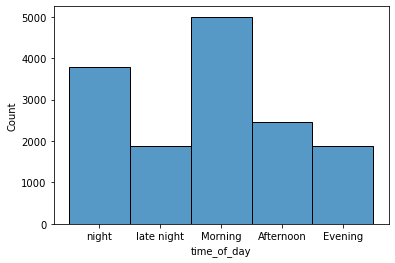

In [22]:
sns.histplot(df["time_of_day"])

### Observations
#### As per obvious, morning was highest amount of orders placed then night and then at afternoon.



In [24]:
df['order_delivered_day'] =  pd.to_datetime(df['order_delivered_date']).dt.day_name()

In [25]:
df['order_placed_day'] =  pd.to_datetime(df['order_placed_date']).dt.day_name()

In [26]:
df.head()

,order_id,order_placed_at,order_delivered_at,time_taken_for_delivery,order_delivered_date,order_delivered_time,order_placed_date,order_placed_time,time_of_day,order_placed_day,order_delivered_day
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719,2023-03-01,00:18:07.443132,2023-03-01,00:00:59,night,Wednesday,Wednesday
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754,2023-03-01,00:19:34.925241,2023-03-01,00:03:59,night,Wednesday,Wednesday
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856,2023-03-01,00:22:28.291385,2023-03-01,00:07:22,night,Wednesday,Wednesday
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657,2023-03-01,00:46:19.019399,2023-03-01,00:07:47,night,Wednesday,Wednesday
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984,2023-03-01,00:25:13.619056,2023-03-01,00:09:03,night,Wednesday,Wednesday


In [27]:
df['order_placed_day'].value_counts()

Thursday     2280
Wednesday    2259
Monday       2256
Friday       2223
Saturday     2209
Sunday       2191
Tuesday      1582
Name: order_placed_day, dtype: int64

<AxesSubplot:xlabel='order_placed_day', ylabel='Count'>

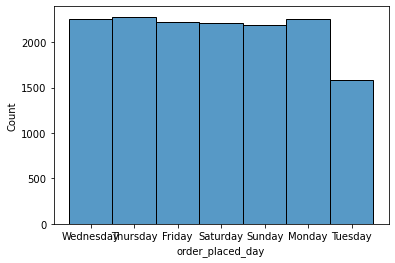

In [28]:
sns.histplot(df['order_placed_day'])

#### Observations
##### Tuesday has the least amount of orders. So maybe we can improve it by marketing it better, or sales tactics like discounts/buy -one- get something for free

In [29]:
df.head()

,order_id,order_placed_at,order_delivered_at,time_taken_for_delivery,order_delivered_date,order_delivered_time,order_placed_date,order_placed_time,time_of_day,order_placed_day,order_delivered_day
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719,2023-03-01,00:18:07.443132,2023-03-01,00:00:59,night,Wednesday,Wednesday
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754,2023-03-01,00:19:34.925241,2023-03-01,00:03:59,night,Wednesday,Wednesday
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856,2023-03-01,00:22:28.291385,2023-03-01,00:07:22,night,Wednesday,Wednesday
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657,2023-03-01,00:46:19.019399,2023-03-01,00:07:47,night,Wednesday,Wednesday
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984,2023-03-01,00:25:13.619056,2023-03-01,00:09:03,night,Wednesday,Wednesday


In [33]:
print("mean =",df['time_taken_for_delivery'].mean())
print("median =",df['time_taken_for_delivery'].median())
print("min =",df['time_taken_for_delivery'].min())
print("max=",df['time_taken_for_delivery'].max())

mean = 20.499389326467746
median = 15.797986066666667
min = 15.000010333333334
max= 7299.831374933333


C:\Users\bhask\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_taken_for_delivery'>

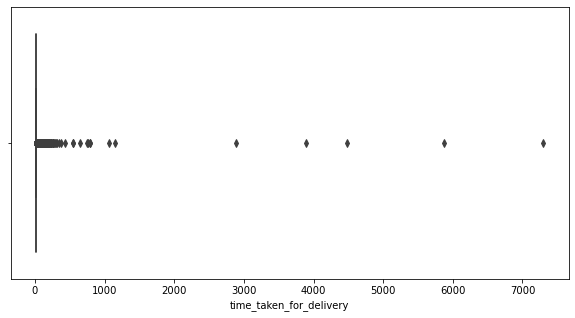

In [35]:
plt.figure(figsize = (10,5))
sns.boxplot(df['time_taken_for_delivery'])

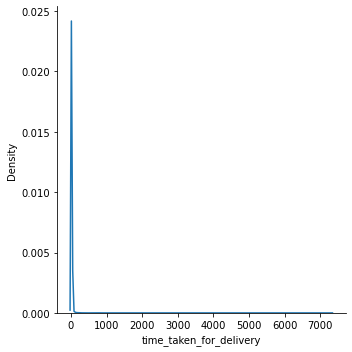

In [36]:
sns.displot(df['time_taken_for_delivery'], kind='kde')

In [38]:
count=0
for i in df['time_taken_for_delivery']:
    if i > 30.00:
        count=count+1
print(f"Out of 15000 deliveries {count} deliveries are late")

Out of 15000 deliveries 604 deliveries are late


In [43]:
(604/15000)*100

4.026666666666666

In [44]:
# since 604 deliveries are late 
pd.set_option("display.max.rows", None)
df[df['time_taken_for_delivery']>1440]

,order_id,order_placed_at,order_delivered_at,time_taken_for_delivery,order_delivered_date,order_delivered_time,order_placed_date,order_placed_time,time_of_day,order_placed_day,order_delivered_day
4165,1527276,2023-03-08 09:46:43,2023-03-12 11:34:09.085175,5867.434753,2023-03-12,11:34:09.085175,2023-03-08,09:46:43,Morning,Wednesday,Sunday
5499,1528610,2023-03-10 17:06:22,2023-03-15 18:46:11.882496,7299.831375,2023-03-15,18:46:11.882496,2023-03-10,17:06:22,Evening,Friday,Wednesday
10007,1533118,2023-03-19 00:56:34,2023-03-21 00:59:41.454974,2883.124250,2023-03-21,00:59:41.454974,2023-03-19,00:56:34,night,Sunday,Tuesday
10225,1533336,2023-03-19 11:07:32,2023-03-22 13:53:25.472592,4485.891210,2023-03-22,13:53:25.472592,2023-03-19,11:07:32,Morning,Sunday,Wednesday
14155,1537266,2023-03-26 09:54:24,2023-03-29 02:42:50.645252,3888.444088,2023-03-29,02:42:50.645252,2023-03-26,09:54:24,Morning,Sunday,Wednesday


### Final Observations
#### Average delivery time is 20.49mins
#### 95% of orders were delivered on time 
#### 4.02% deliveries are late 
#### Longest time taken for one delivery is 7299mins
#### Most orders are placed between 4am to 12pm ie., mornings
#### Tuesday has the least amount of orders placed
